# UTHAMO Data Visualization

### This notebook loads and visualizes data from the UTHAMO dataset, including CSI magnitude, right-hand trajectory from video, and right-hand angular velocity from IMU for subject 5, orientation 180°, gesture 'left-right', trial 1.

## Import Libraries

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Define Moving Average Function

Define a function to compute a moving average for smoothing the CSI magnitude data.

In [2]:
def moving_average(x, w):
    l = len(x)
    x = np.concatenate([x[::-1], x, x[::-1]])
    return np.convolve(x, np.ones(w), 'same')[l:-l] / w

## Load Pickle Files

Define a function to load pickle files and load the CSI, video, and IMU data from the specified file paths.

In [3]:
# File paths (update these to your actual file paths)
CSI_FILE = 'UTHAMO_CSI.pickle'
VIDEO_FILE = 'UTHAMO_video_trajectories.pickle'
IMU_FILE = 'UTHAMO_IMU_Motion_Sensor.pickle'

# Load pickle files
def load_pickle(file_path):
    with open(file_path, 'rb') as handle:
        return pickle.load(handle)

# Load data
csi_data, csi_info, csi_authors = load_pickle(CSI_FILE)
video_data, video_info, video_authors = load_pickle(VIDEO_FILE)
imu_data, imu_info, imu_authors = load_pickle(IMU_FILE)

## Set Parameters

Define the parameters for data extraction: subject ID, orientation, gesture, trial, access point, and antenna.

In [4]:
# Parameters for data extraction
subject_id = 5
orientation = 180
gesture = 'left-right'
trial = 1
access_point = 5
antenna = 1

## Extract CSI Magnitude

Extract the CSI magnitude for the specified subject, orientation, gesture, trial, access point, and antenna.

In [5]:
# Extract CSI magnitude
csi_key = (f"subject ID: {subject_id}", f"gesture: {gesture}", f"trial: {trial}")
csi_subkey = (f"orientation: {orientation}", f"access point: {access_point}", f"antenna: {antenna}")
csi_signal = csi_data[csi_key][csi_subkey]
if csi_signal is not None:
    csi_magnitude = np.abs(csi_signal)  # Compute magnitude
else:
    raise ValueError("CSI data is None for the specified parameters.")

## Extract Video Trajectory

Extract the right-hand trajectory from the video data. Note: The video data key is adjusted to match the dataset structure (subject_id, orientation, gesture, trial) and extract the 'Right Hand' trajectory.

In [6]:
# Extract video trajectory (right hand)
video_key = (f"subject ID: {subject_id}", f"gesture: {gesture}", f"trial: {trial}")
video_subkey = (f"orientation: {orientation}", f"access point: {access_point}")

if video_key in video_data:
    right_hand_traj = video_data[video_key][video_subkey]['right hand']
else:
    raise ValueError("Video trajectory data not found for the specified parameters.")

## Extract IMU Angular Velocity

Extract the right-hand angular velocity from the IMU data for the specified parameters.

In [7]:
# Extract IMU angular velocity
imu_key = (f"subject ID: {subject_id}", f"gesture: {gesture}", f"trial: {trial}")
imu_subkey = f"orientation: {orientation}"
imu_angular_velocity = imu_data[imu_key][imu_subkey]['Angular Velocity']

## Plot Data

Create a figure with three subplots to visualize the CSI magnitude (smoothed, subcarrier 21), right-hand trajectory (X, Y, Z), and IMU angular velocity (X, Y, Z).

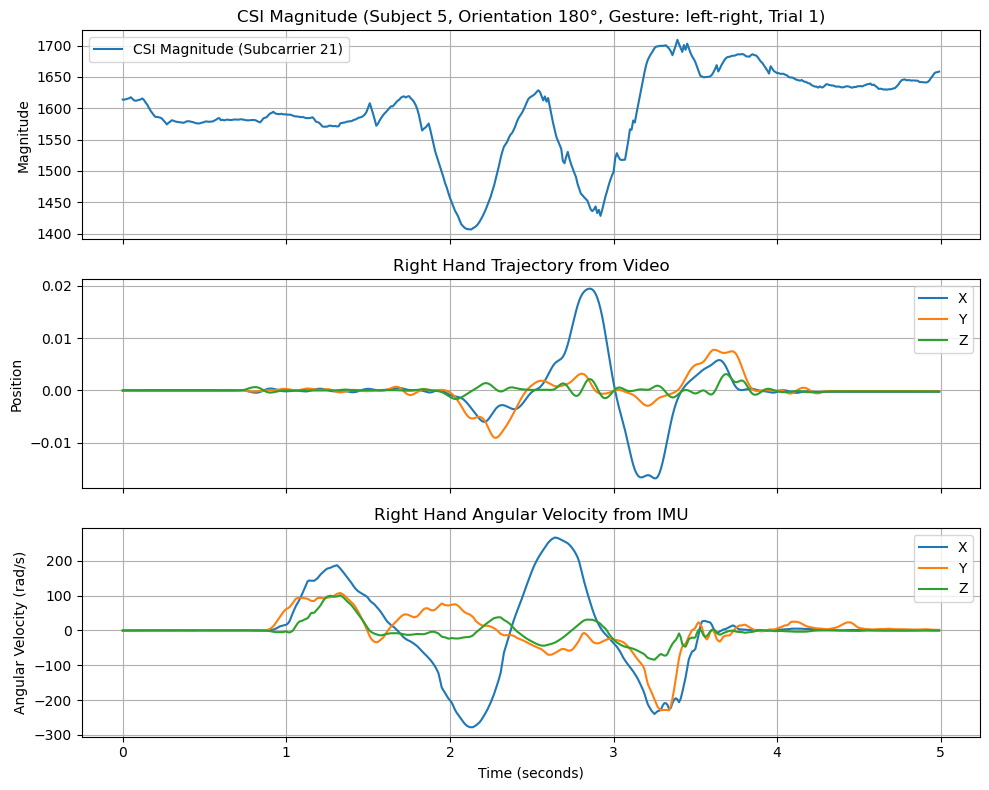

In [8]:
# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot CSI magnitude (subcarrier 21, smoothed)
time_csi = np.arange(csi_magnitude.shape[1]) / 100  # 100 Hz sampling rate
ax1.plot(time_csi, moving_average(csi_magnitude[20, :], 32), label='CSI Magnitude (Subcarrier 21)')
ax1.set_ylabel('Magnitude')
ax1.set_title(f'CSI Magnitude (Subject {subject_id}, Orientation {orientation}°, Gesture: {gesture}, Trial {trial})')
ax1.legend()
ax1.grid(True)

# Plot right hand trajectory (X, Y, Z coordinates)
time_video = np.arange(right_hand_traj.shape[1]) / 100  # 100 Hz sampling rate
ax2.plot(time_video, right_hand_traj[0, :], label='X')
ax2.plot(time_video, right_hand_traj[1, :], label='Y')
ax2.plot(time_video, right_hand_traj[2, :], label='Z')
ax2.set_ylabel('Position')
ax2.set_title('Right Hand Trajectory from Video')
ax2.legend()
ax2.grid(True)

# Plot IMU angular velocity (X, Y, Z components)
time_imu = np.arange(imu_angular_velocity.shape[1]) / 100  # 100 Hz sampling rate
ax3.plot(time_imu, imu_angular_velocity[0, :], label='X')
ax3.plot(time_imu, imu_angular_velocity[1, :], label='Y')
ax3.plot(time_imu, imu_angular_velocity[2, :], label='Z')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Angular Velocity (rad/s)')
ax3.set_title('Right Hand Angular Velocity from IMU')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()